In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("house_prices_dataset.csv")
df.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


### Posttest2
soal 1: Dari hasil statistik deskriptif terlihat bahwa setiap atribut numerik memiliki sebaran nilai yang beragam. Nilai rata-rata dan standar deviasi menunjukkan adanya perbedaan besar antara data rumah dengan harga rendah dan tinggi. Kuartil (Q1–Q3) membantu memahami persebaran data dan mendeteksi kemungkinan adanya nilai ekstrem (outlier).

soal 2: Sepuluh record pertama memperlihatkan contoh nilai dari atribut numerik seperti luas tanah, tahun pembangunan, dan harga. Dari sini kita bisa melihat skala nilai antar kolom dan memastikan tidak ada data kosong atau format yang salah.

soal 3: Dataset memiliki jumlah record dan atribut yang cukup banyak, menunjukkan data yang lengkap untuk analisis. Terdapat beberapa atribut numerik yang relevan untuk perhitungan statistik, serta beberapa atribut non-numerik untuk analisis kategori.

soal 4: Setiap atribut bertipe objek memiliki jumlah label unik yang berbeda. Misalnya, kolom seperti Neighborhood atau HouseStyle menunjukkan variasi kategori yang bisa memengaruhi harga rumah. Semakin banyak label unik, semakin luas keragaman data yang direpresentasikan.

soal 5: Grafik histogram menunjukkan bahwa distribusi harga rumah tidak merata (right-skewed). Kebanyakan rumah berada di kisaran harga menengah ke bawah, sedangkan sebagian kecil memiliki harga tinggi. Distribusi seperti ini umum ditemukan dalam data properti.

soal 6: Heatmap memperlihatkan hubungan antar variabel numerik. Atribut seperti OverallQual, GrLivArea, dan GarageCars memiliki korelasi tinggi terhadap harga rumah. Artinya, semakin baik kualitas bangunan dan semakin besar ukuran rumah, maka harga rumah cenderung meningkat.

### kesimpulan
Secara keseluruhan, dataset harga rumah memberikan informasi yang kaya tentang faktor-faktor yang memengaruhi nilai properti.
Analisis statistik dan visualisasi menunjukkan bahwa harga rumah dipengaruhi oleh kualitas, ukuran, serta kondisi bangunan.
Dataset ini sangat cocok digunakan untuk model prediksi seperti regresi linier atau machine learning berbasis harga rumah.

In [3]:
# 1 Tampilkan rata-rata, standar deviasi, min, max, Q1, Q2, Q3 dari atribut bertipe angka

numeric_df = df.select_dtypes(include=[np.number])
statistik = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Std Dev': numeric_df.std(),
    'Min': numeric_df.min(),
    'Q1': numeric_df.quantile(0.25),
    'Q2 (Median)': numeric_df.quantile(0.5),
    'Q3': numeric_df.quantile(0.75),
    'Max': numeric_df.max()
})
statistik

,Mean,Std Dev,Min,Q1,Q2 (Median),Q3,Max
square_feet,1999.147496,501.021194,500.000000,1663.704735,1998.702512,2335.540444,3963.118853
num_rooms,4.495100,1.711160,2.000000,3.000000,4.000000,6.000000,7.000000
age,49.516900,28.992336,0.000000,24.000000,49.000000,75.000000,99.000000
distance_to_city(km),15.362148,8.325101,1.000161,8.121636,15.403146,22.447530,29.993892
price,263011.571609,98336.945117,-95613.138249,196791.510684,262497.361236,330445.581908,660168.255648


In [4]:
# Tampilkan 10 record pertama dari atribut bertipe angka
numeric_df.head(10)

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
5,1882.931522,2,70,16.510014,171397.001685
6,2789.606408,6,8,28.364627,438704.163041
7,2383.717365,5,3,3.285625,438745.704315
8,1765.262807,7,65,15.914028,243125.068444
9,2271.280022,3,90,23.227202,171466.048061


In [5]:
# Tampilkan informasi jumlah record, jumlah attribute, nama attribute, dan jumlah attribute bertipe angka

jumlah_record = df.shape[0]
jumlah_atribut = df.shape[1]
nama_atribut = list(df.columns)
jumlah_atribut_angka = len(numeric_df.columns)

print(f"Jumlah Record: {jumlah_record}")
print(f"Jumlah Atribut: {jumlah_atribut}")
print(f"Nama Atribut: {nama_atribut}")
print(f"Jumlah Atribut dengan Tipe Angka: {jumlah_atribut_angka}")

Jumlah Record: 10000
Jumlah Atribut: 5
Nama Atribut: ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price']
Jumlah Atribut dengan Tipe Angka: 5


In [6]:
# Tampilkan jumlah label unik dari semua atribut bertipe object

object_df = df.select_dtypes(include=['object'])
for col in object_df.columns:
    print(f"{col}: {object_df[col].nunique()} label unik")

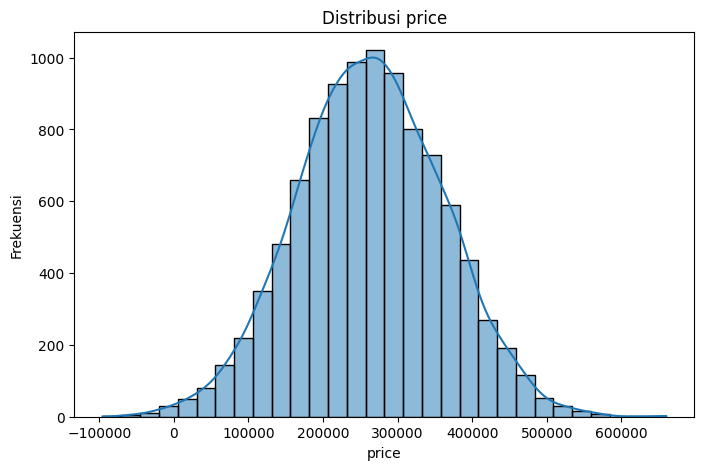

In [7]:
# 8️Visualisasi dataset dengan grafik yang paling sesuai
possible_price_cols = ['Price', 'price', 'SalePrice', 'Harga', 'harga', 'median_house_value']
price_col = None

for col in df.columns:
    if col in possible_price_cols:
        price_col = col
        break

if price_col is None:
    # Jika tidak ditemukan, tampilkan semua kolom agar kamu tahu pilih yang mana
    print("Tidak ditemukan kolom harga. Kolom yang tersedia:")
    print(df.columns.tolist())
else:
    plt.figure(figsize=(8,5))
    sns.histplot(df[price_col], bins=30, kde=True)
    plt.title(f'Distribusi {price_col}')
    plt.xlabel(price_col)
    plt.ylabel('Frekuensi')
    plt.show()


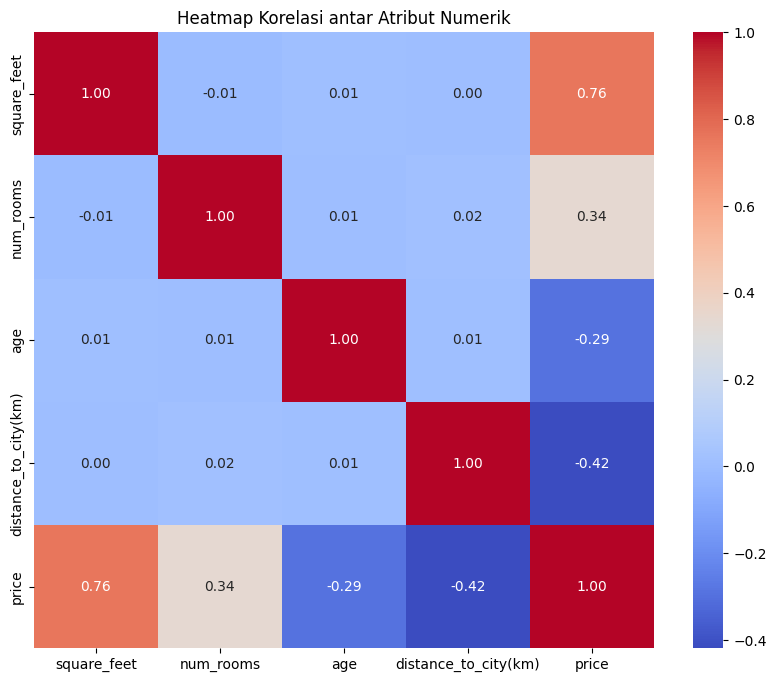

In [8]:
# Tampilkan korelasi dataset menggunakan heatmap.

plt.figure(figsize=(10,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Atribut Numerik')
plt.show()


### posttest3

### Soal 1 bagian Data cleaning (Handling Missing value) 
Berdasarkan hasil output code program dapat disimpulkan bahwa tidak terdapat nilai yang hilang (missing value) pada seluruh kolom dalam dataset house_prices_dataset.csv

In [9]:
# 1. Data Cleaning (Handling missing value)

print("\nOutput Data Cleaning (Handling Missing Value) :")
print(df.isnull().sum())


Output Data Cleaning (Handling Missing Value) :
square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64


### Soal 1 bagian Data cleaning (Handling Duplicate Value) 
Berdasarkan hasil output code program dapat disimpulkan bahwa tidak terdapat data duplikat pada dataset house_prices_dataset.csv.

In [10]:
# 1. Data Cleaning (Handling duplicate value)

duplikat = df.duplicated().sum()
print("\nOutput Data Cleaning (Handling Duplicate Value) :")
print(f"Jumlah duplikat: {duplikat}")


Output Data Cleaning (Handling Duplicate Value) :
Jumlah duplikat: 0


### Soal 1 bagian Data cleaning (Handling Outlier) 
Berdasarkan hasil output code program dan visualisasi boxplot dapat disimpulkan bahwa ditemukan 83 outlier pada kolom square_feet dan 64 outlier pada kolom price, sedangkan kolom lainnya tidak memiliki outlier.
Outlier telah ditangani menggunakan metode IQR dengan teknik clipping, sehingga data menjadi lebih bersih dan terdistribusi normal tanpa nilai ekstrem.


Output Data Cleaning (Handling Outlier Value) :

🔹 Kolom numerik: ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price']


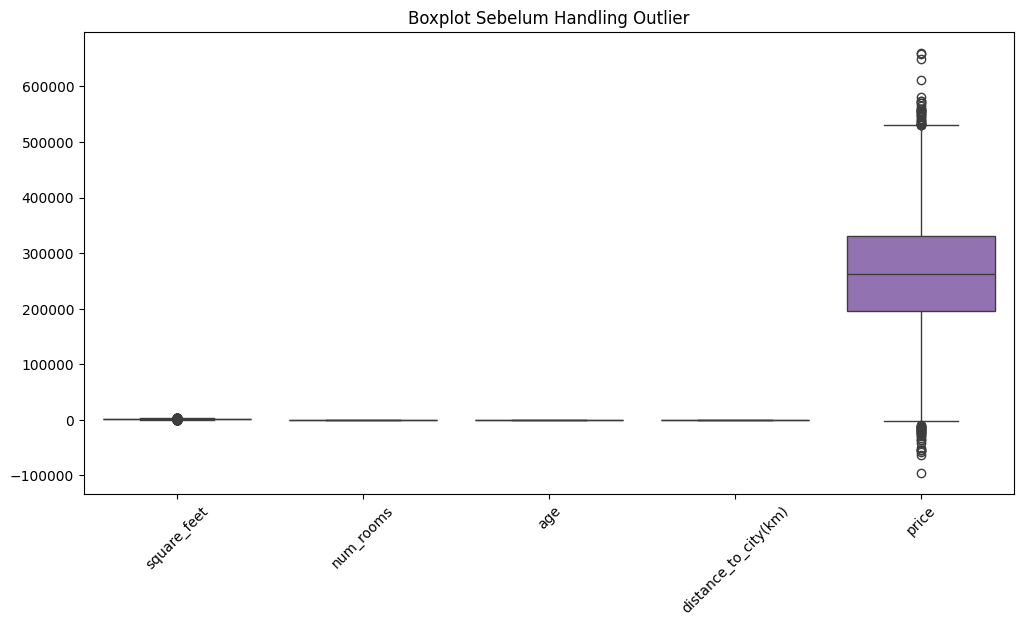

Kolom 'square_feet' memiliki 83 outlier → di-clipping.
Kolom 'num_rooms' tidak memiliki outlier.
Kolom 'age' tidak memiliki outlier.
Kolom 'distance_to_city(km)' tidak memiliki outlier.
Kolom 'price' memiliki 64 outlier → di-clipping.


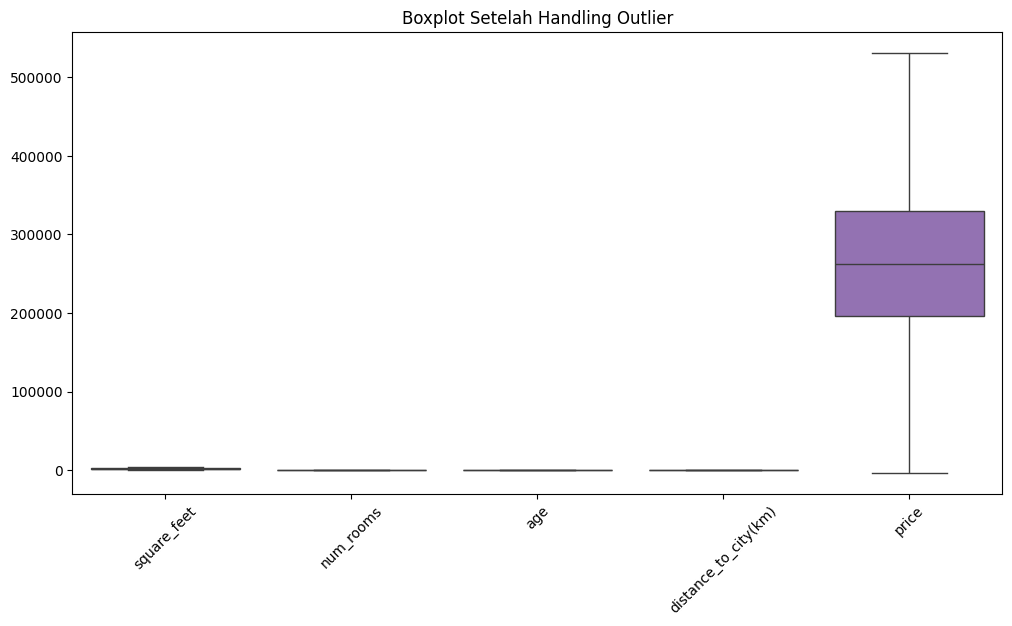


Outlier telah ditangani menggunakan metode IQR.

Dataset Bersih


,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1998.949846,4.49510,49.516900,15.362148,262992.911367
std,498.015957,1.71116,28.992336,8.325101,97780.103862
min,655.951172,2.00000,0.000000,1.000161,-3689.596152
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3343.294007,7.00000,99.000000,29.993892,530926.688744


Jumlah data akhir: (10000, 5)


In [11]:
# 1. Data Cleaning (Handling outlier)

numeric_cols = df.select_dtypes(include=np.number).columns
print("\nOutput Data Cleaning (Handling Outlier Value) :")
print("\n🔹 Kolom numerik:", list(numeric_cols))

# fungsi Visualisasi Sebelum Handling Outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot Sebelum Handling Outlier')
plt.xticks(rotation=45)
plt.show()

# fungsi Deteksi dan Penanganan Outlier dengan IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    if outliers > 0:
        print(f"Kolom '{col}' memiliki {outliers} outlier → di-clipping.")
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    else:
        print(f"Kolom '{col}' tidak memiliki outlier.")

# fungsi Visualisasi Sesudah Handling Outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot Setelah Handling Outlier')
plt.xticks(rotation=45)
plt.show()

# fungsi menampilkan Outlier yang  telah di tanganin menggunakan IQR
print("\nOutlier telah ditangani menggunakan metode IQR.")
print("\nDataset Bersih")
display(df.describe())
print("Jumlah data akhir:", df.shape)

### Soal 2
Proses normalisasi (Min–Max) berhasil mengubah nilai setiap kolom numerik ke dalam rentang 0–1, sedangkan standarisasi (Z-Score) menjadikan data memiliki rata-rata 0 dan standar deviasi 1.
Kedua teknik ini membuat skala antar fitur menjadi seimbang sehingga data siap digunakan untuk proses pemodelan machine learning.

In [12]:
# 2. Normalisasi/standarisasi kolom numerik

# Normalisasi
scaler_minmax = MinMaxScaler(feature_range=(0,1))
df_minmax = df.copy()
df_minmax[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

print("Hasil Normalisasi:")
display(df_minmax.head())

# Standarisasi
scaler_std = StandardScaler()
df_std = df.copy()
df_std[numeric_cols] = scaler_std.fit_transform(df[numeric_cols])

print("Hasil Standarisasi:")
display(df_std.head())

Hasil Normalisasi:


,square_feet,num_rooms,age,distance_to_city(km),price
0,0.592558,0.2,0.929293,0.758709,0.381701
1,0.474415,0.0,0.222222,0.447824,0.509664
2,0.620648,0.8,0.333333,0.707076,0.596148
3,0.783511,0.2,0.636364,0.322259,0.671138
4,0.456574,1.0,0.545455,0.844494,0.444967


Hasil Standarisasi:


,square_feet,num_rooms,age,distance_to_city(km),price
0,0.500827,-0.873778,1.465395,0.917251,-0.640437
1,-0.136713,-1.458207,-0.949157,-0.165519,0.059237
2,0.652410,0.879506,-0.569727,0.737421,0.532118
3,1.531283,-0.873778,0.465081,-0.602847,0.942146
4,-0.232989,1.463934,0.154638,1.216028,-0.294510


### Soal 3
dari hasil Proses encoding Kolom square_feet dan price telah berhasil dikonversi menjadi dua kolom kategorikal baru, yaitu:
- size_category yang mengelompokkan luas petak rumah menjadi Kecil, Medium, dan Besar;
- price_category yang mengelompokkan harga rumah menjadi Murah, Medium, dan Mahal.
Kedua kolom kategorikal tersebut kemudian diubah ke dalam bentuk numerik biner menggunakan One-Hot Encoding, sehingga data dapat diproses oleh model machine learning.

In [13]:
# 3. Encoding kolom kategorikal

df_encoded = df.copy()

# Encoding Kolom Luas Petak (square_feet)

# Membuat kategori luas petak rumah
bins_sqft = [df['square_feet'].min(), 1500, 2500, df['square_feet'].max()]
labels_sqft = ['Kecil', 'Medium', 'Besar']

df_encoded['size_category'] = pd.cut(df_encoded['square_feet'], bins=bins_sqft, labels=labels_sqft)

# One-Hot Encoding untuk size_category
df_size_encoded = pd.get_dummies(df_encoded[['square_feet', 'size_category']], columns=['size_category'])

print("\nOutput Encoding Kolom Kategorikal Luas Petak:")
display(df_size_encoded.head())

#  Encoding Kolom Harga Rumah (price)

# Membuat kategori harga rumah
bins_price = [df['price'].min(), 200000, 300000, df['price'].max()]
labels_price = ['Murah', 'Medium', 'Mahal']

df_encoded['price_category'] = pd.cut(df_encoded['price'], bins=bins_price, labels=labels_price)

# One-Hot Encoding untuk price_category
df_price_encoded = pd.get_dummies(df_encoded[['price', 'price_category']], columns=['price_category'])

print("\nOutput Encoding Kolom Kategorikal Harga Rumah:")
display(df_price_encoded.head())


Output Encoding Kolom Kategorikal Luas Petak:


,square_feet,size_category_Kecil,size_category_Medium,size_category_Besar
0,2248.357077,False,True,False
1,1930.867849,False,True,False
2,2323.844269,False,True,False
3,2761.514928,False,False,True
4,1882.923313,False,True,False



Output Encoding Kolom Kategorikal Harga Rumah:


,price,price_category_Murah,price_category_Medium,price_category_Mahal
0,200374.090410,False,True,False
1,268784.847337,False,True,False
2,315020.857676,False,False,True
3,355111.468459,False,False,True
4,234197.123903,False,True,False


### Soal 4
Proses Feature Engineering, telah dibuat dua fitur baru yaitu age_group dan price_group.
Fitur age_group mengelompokkan umur bangunan menjadi empat kategori, yaitu Baru, Paruh Baya, Tua, dan Sangat Tua.
Sementara itu, fitur price_group mengelompokkan harga rumah menjadi Murah, Sedang, Mahal, dan Mewah.

In [14]:
# 4. Feature engineering (minimal 1 feature baru)

# Feature 1 Kelompok Umur Bangunan
bins_age = [0, 10, 30, 60, 100]
labels_age = ['Baru', 'Paruh Baya', 'Tua', 'Sangat Tua']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)

# Feature 2 Kelompok Harga Rumah
bins_price = [0, 200000, 500000, 1000000, 9999999]
labels_price = ['Murah', 'Sedang', 'Mahal', 'Mewah']
df['price_group'] = pd.cut(df['price'], bins=bins_price, labels=labels_price)

print("\nOutput Feature Engineering:")
display(df[['age', 'age_group', 'price', 'price_group']].head())


Output Feature Engineering:


,age,age_group,price,price_group
0,92,Sangat Tua,200374.090410,Sedang
1,22,Paruh Baya,268784.847337,Sedang
2,33,Tua,315020.857676,Sedang
3,63,Sangat Tua,355111.468459,Sedang
4,54,Tua,234197.123903,Sedang


### Soal 5
Pada tahap proses Data Splitting, data dibagi menjadi dua bagian yaitu data training dan data testing dengan perbandingan 80% untuk training dan 20% untuk testing.
Proses ini dilakukan agar model dapat belajar dari data training dan kemudian dievaluasi menggunakan data testing untuk mengukur kinerjanya terhadap data baru.
Hasil pembagian menunjukkan bahwa X_train dan y_train masing-masing berisi 8000 data, sedangkan X_test dan y_test berisi 2000 data.

In [15]:
# 5. Splitting data ke dalam data training & data testing

X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nOutput Data Splittin:")
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test :", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test :", y_test.shape)



Output Data Splittin:
Dimensi X_train: (8000, 6)
Dimensi X_test : (2000, 6)
Dimensi y_train: (8000,)
Dimensi y_test : (2000,)
